In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Preprocessed dataset with all input for XAI model.xlsx"

In [3]:
import pandas as pd
df = pd.read_excel(file_path)

In [4]:
df.head()

,Soiling Loss Factor,Generated Energy,Array Output,Ambient Temperature,Solar Irradiance,Array Current,Inverter Losses,Array Voltage,Module Temperature,PR,date
0,1.0,0.211688,0.211678,0.321560,0.198475,0.197512,0.211166,0.834910,0.267526,0.8237,1/1/2021 7:00
1,1.0,0.484108,0.480951,0.371656,0.458243,0.457512,0.326532,0.780419,0.432935,0.8719,1/1/2021 8:00
2,1.0,0.695769,0.691928,0.423660,0.678031,0.676939,0.503982,0.695509,0.582402,0.8587,1/1/2021 9:00
3,1.0,0.833341,0.831237,0.468508,0.835898,0.836487,0.728286,0.611557,0.697065,0.8402,1/1/2021 10:00
4,1.0,0.891224,0.889850,0.504052,0.908885,0.909727,0.822648,0.565389,0.762636,0.8272,1/1/2021 11:00


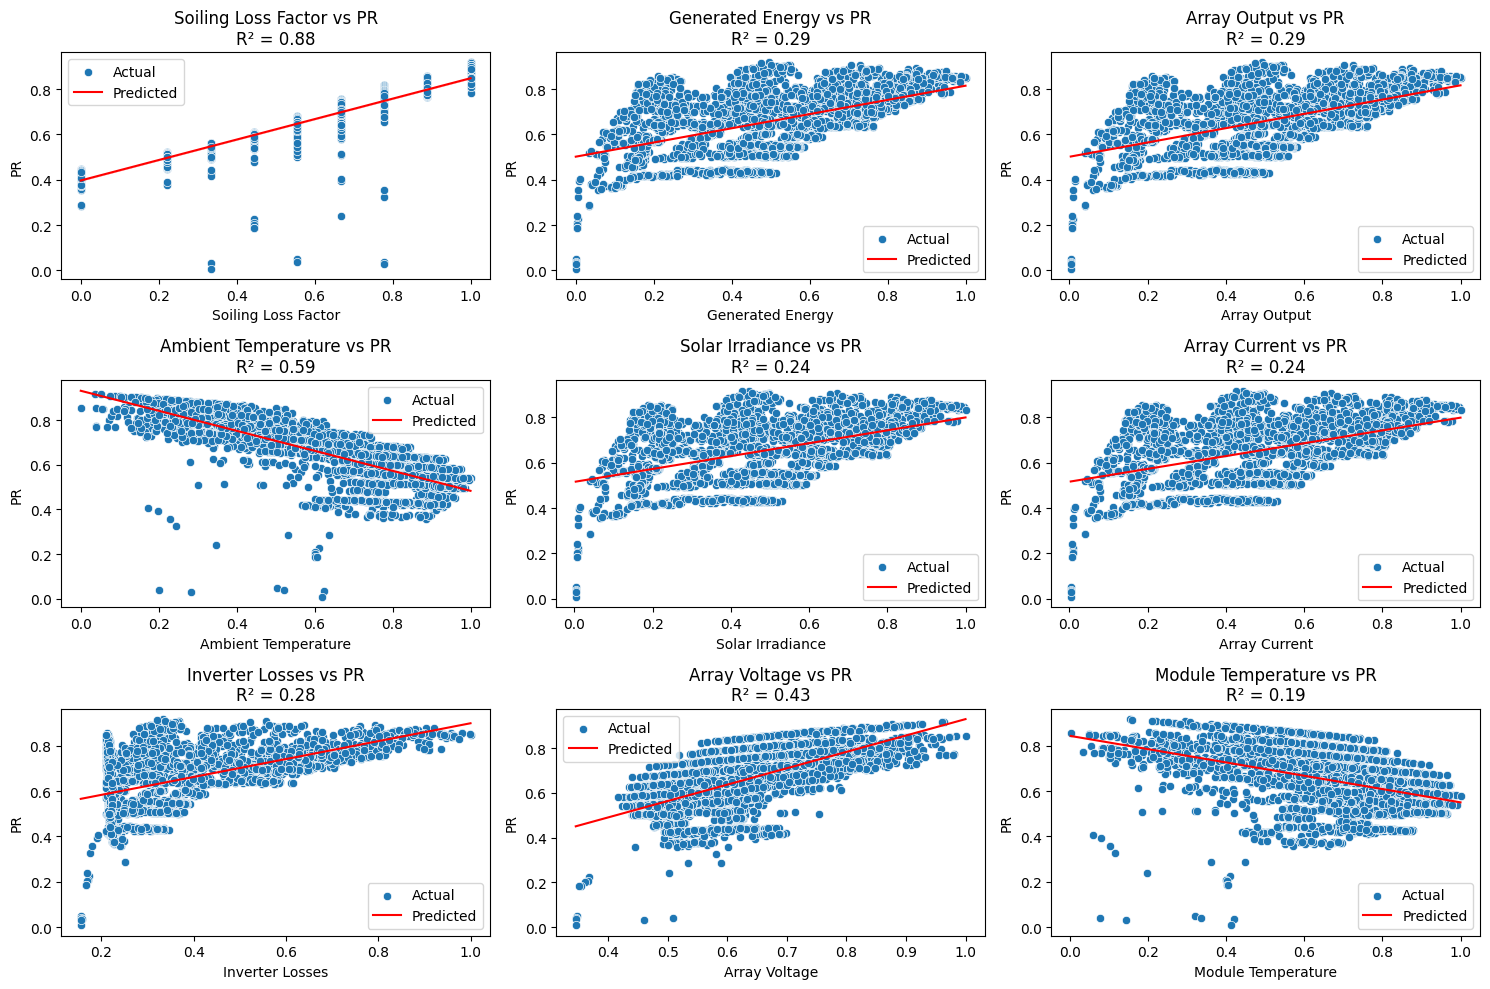

Ranked Parameters:
                     Coefficient
Array Voltage           0.732723
Soiling Loss Factor     0.451101
Ambient Temperature     0.448016
Inverter Losses         0.394975
Array Output            0.315119
Generated Energy        0.313088
Module Temperature      0.293368
Solar Irradiance        0.284171
Array Current           0.282527


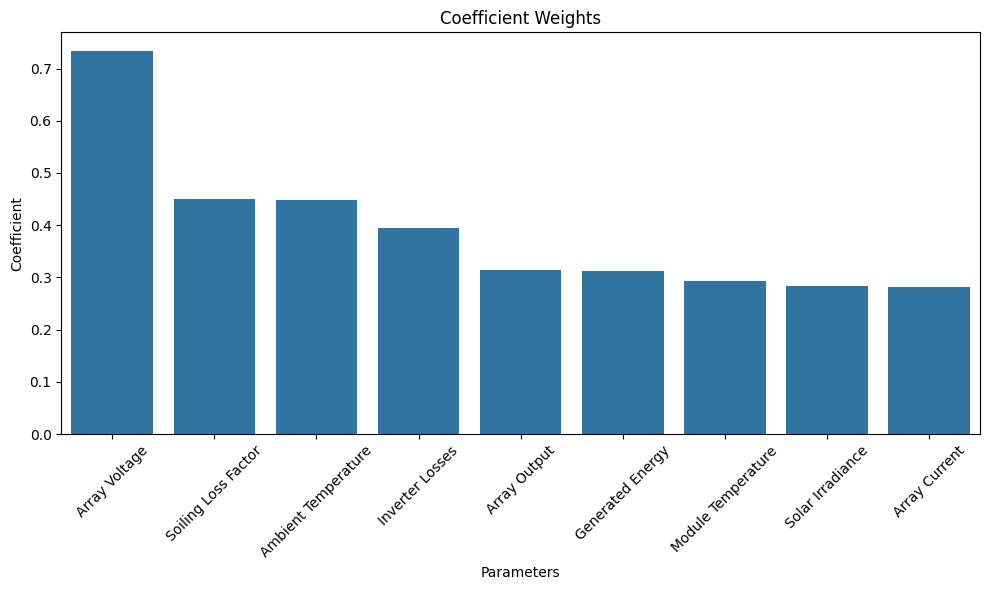

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load your dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Preprocessed dataset with all input for XAI model.xlsx"
df = pd.read_excel(file_path)

# Separate features and target variable
X = df.drop(['PR', 'date'], axis=1)  # Features (all columns except PR and date)
y = df['PR']  # Target variable (PR)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train univariate linear regression models and store coefficients and R² values
coefficients = {}
r2_values = {}

plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns):
    model = LinearRegression()
    X_feature = X_train[column].values.reshape(-1, 1)
    model.fit(X_feature, y_train)
    coefficients[column] = model.coef_[0]

    # Predict and calculate R² value
    y_pred = model.predict(X_feature)
    r2_values[column] = r2_score(y_train, y_pred)

    # Plotting
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=X_train[column], y=y_train, label='Actual')
    sns.lineplot(x=X_train[column], y=y_pred, color='red', label='Predicted')
    plt.title(f'{column} vs PR\nR² = {r2_values[column]:.2f}')
    plt.xlabel(column)
    plt.ylabel('PR')
    plt.legend()

plt.tight_layout()
plt.show()

# Convert the dictionary to a DataFrame for easier sorting
coefficients_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Coefficient'])

# Rank the parameters based on coefficient weights
ranked_parameters = coefficients_df.abs().sort_values(by='Coefficient', ascending=False)

# Display the ranked parameters
print("Ranked Parameters:")
print(ranked_parameters)

# Plot the coefficient weights
plt.figure(figsize=(10, 6))
sns.barplot(x=ranked_parameters.index, y=ranked_parameters['Coefficient'])
plt.title('Coefficient Weights')
plt.xlabel('Parameters')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
!pip install tensorflow

In [12]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ea2c5fc7a84121a1f8520e0214adbb9ba6e55c3546cea85b8f34b1fb7f97aeaf
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


Filtered Features DataFrame Head:
   Soiling Loss Factor  Generated Energy  Array Output  Ambient Temperature  \
0                  1.0          0.211688      0.211678             0.321560   
1                  1.0          0.484108      0.480951             0.371656   
2                  1.0          0.695769      0.691928             0.423660   
3                  1.0          0.833341      0.831237             0.468508   
4                  1.0          0.891224      0.889850             0.504052   

   Inverter Losses  Array Voltage  
0         0.211166       0.834910  
1         0.326532       0.780419  
2         0.503982       0.695509  
3         0.728286       0.611557  
4         0.822648       0.565389  
Training with SGD optimizer...
Training with Adam optimizer...
Training with Adagrad optimizer...
Training with RMSprop optimizer...
Training with Adadelta optimizer...
Optimizer: SGD
Final Test Loss: 0.0007
R^2 Score: 0.9388
Mean Absolute Error (MAE): 0.0306
Mean Squared Er

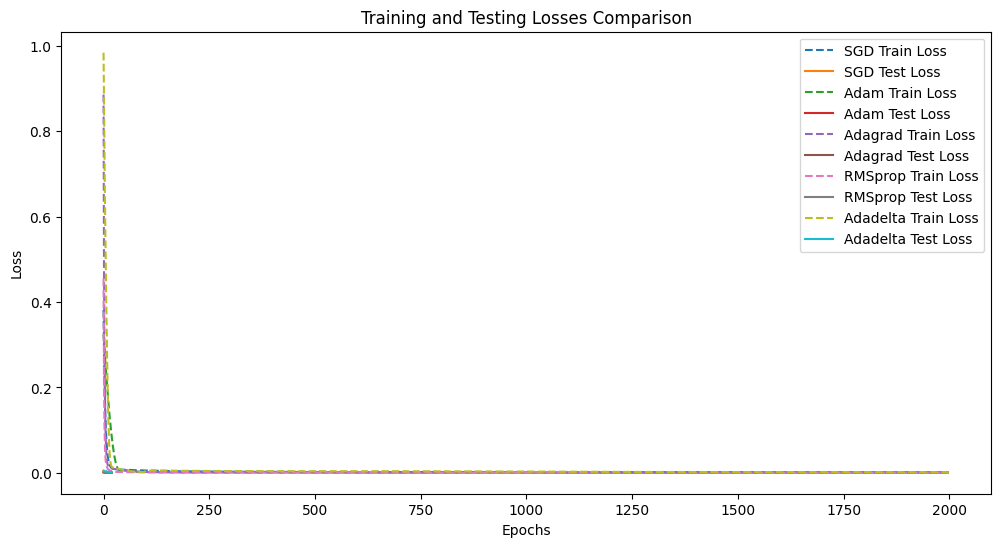

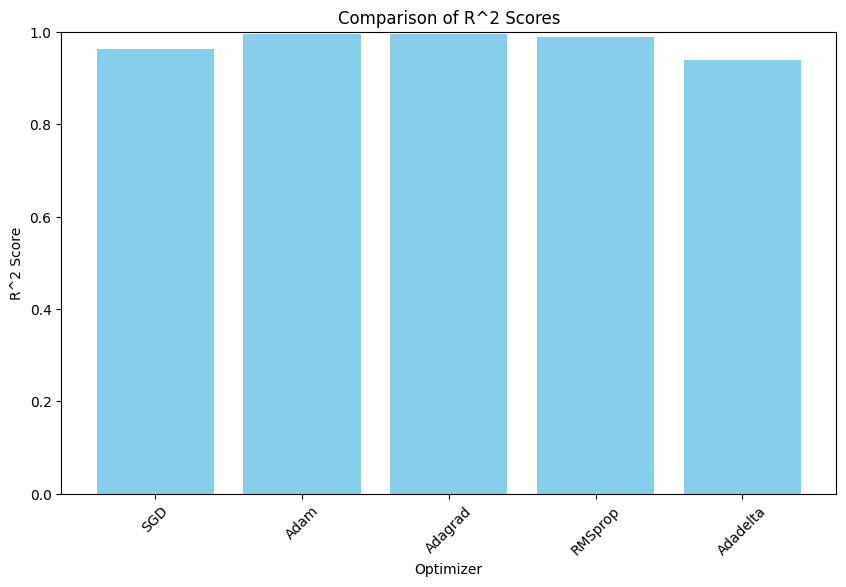

Best Optimizer based on R^2 Score: Adagrad

Metrics for the Best Model (Based on R^2 Score):
Mean Squared Error (MSE): 0.0001
Mean Absolute Error (MAE): 0.0049
Root Mean Squared Error (RMSE): 0.0086
R^2 Score: 0.9957


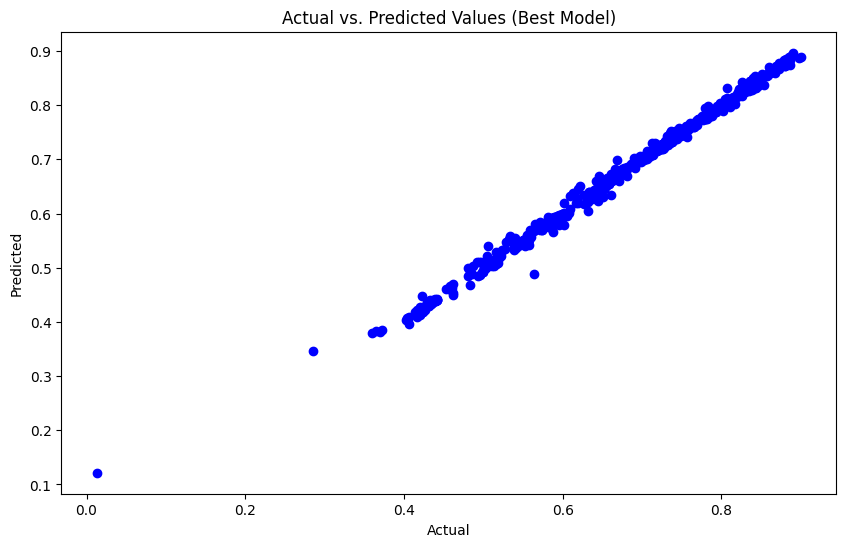

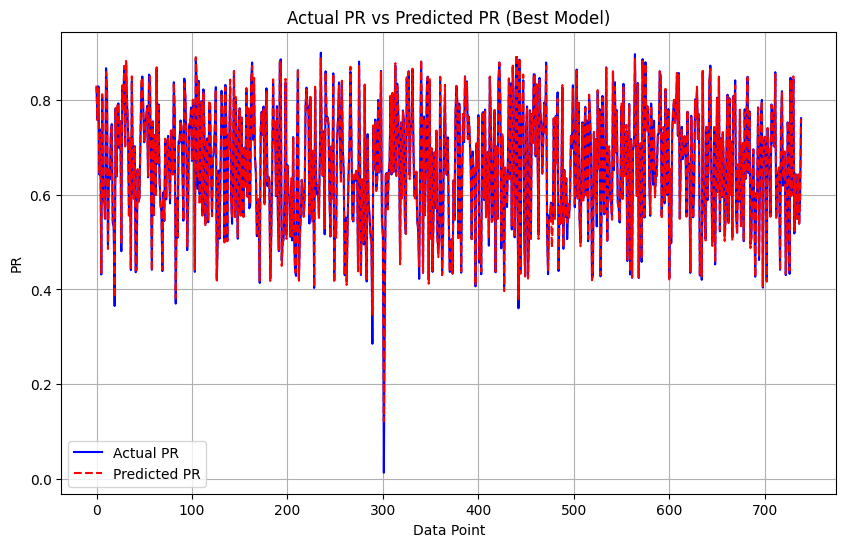

Epoch 1/50, Train Loss: 0.192793, Test Loss: 0.015961
Epoch 11/50, Train Loss: 0.002055, Test Loss: 0.001298
Epoch 21/50, Train Loss: 0.001684, Test Loss: 0.000981
Epoch 31/50, Train Loss: 0.001244, Test Loss: 0.000726
Epoch 41/50, Train Loss: 0.000948, Test Loss: 0.000469
Epoch 1/50, Train Loss: 0.087832, Test Loss: 0.007533
Epoch 11/50, Train Loss: 0.001195, Test Loss: 0.000630
Epoch 21/50, Train Loss: 0.000895, Test Loss: 0.000420
Epoch 31/50, Train Loss: 0.000722, Test Loss: 0.000342
Epoch 41/50, Train Loss: 0.000610, Test Loss: 0.000294
Epoch 1/50, Train Loss: 0.138426, Test Loss: 0.013351
Epoch 11/50, Train Loss: 0.001124, Test Loss: 0.000580
Epoch 21/50, Train Loss: 0.000786, Test Loss: 0.000349
Epoch 31/50, Train Loss: 0.000660, Test Loss: 0.000319
Epoch 41/50, Train Loss: 0.000542, Test Loss: 0.000265
CNN Model Evaluation:
MSE: 0.000427
MAE: 0.010461
RMSE: 0.020658
R^2 Score: 0.975230
------------------------------------
Simple RNN Model Evaluation:
MSE: 0.000261
MAE: 0.008944

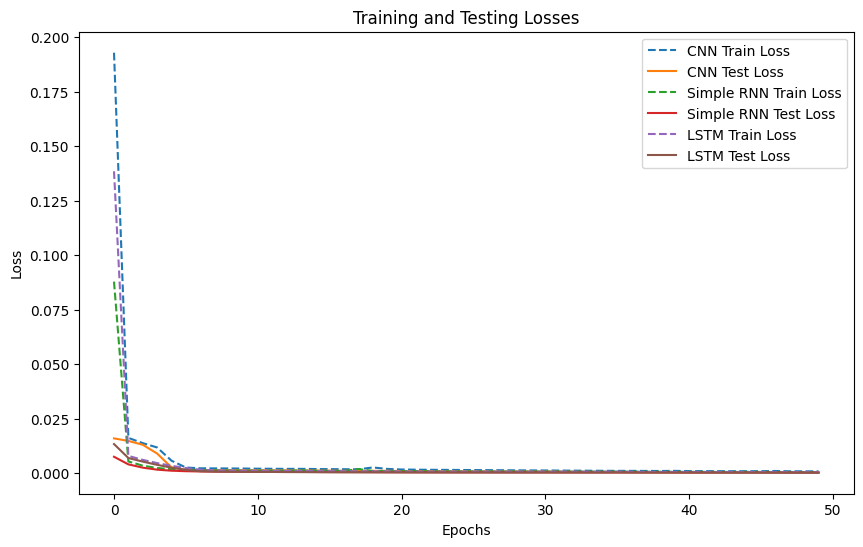

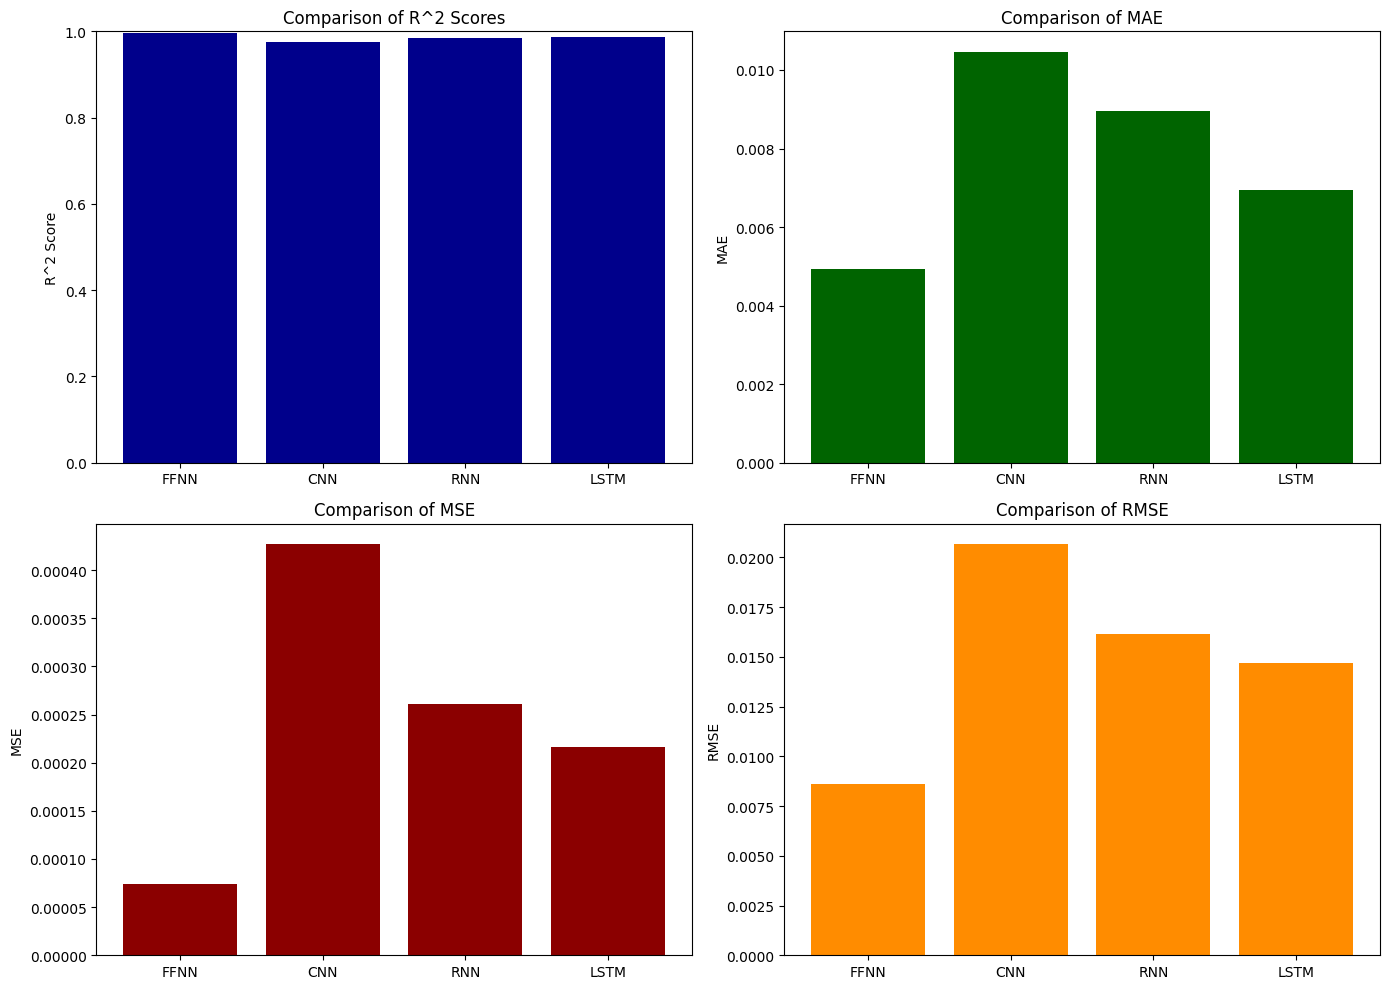


LIME Explanation:



LIME explanation saved to 'lime_explanation.html'


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import time
import lime
import lime.lime_tabular

# Load the data
file_path = "/content/drive/MyDrive/Colab Notebooks/Preprocessed dataset with all input for XAI model.xlsx"
df = pd.read_excel(file_path)

# Separate features and target variable
X = df.drop(['PR', 'date'], axis=1)  # Features (all columns except PR and date)
y = df['PR']  # Target variable (PR)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train univariate linear regression models and store coefficients
from sklearn.linear_model import LinearRegression
coefficients = {}
for column in X.columns:
    model = LinearRegression()
    X_feature = X[column].values.reshape(-1, 1)
    model.fit(X_feature, y)
    coefficients[column] = model.coef_[0]

# Convert the dictionary to a DataFrame for easier sorting
coefficients_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Coefficient'])

# Filter parameters with coefficients above 0.30
filtered_parameters = coefficients_df[coefficients_df['Coefficient'].abs() > 0.30]
filtered_features = filtered_parameters.index.tolist()

# Create a new DataFrame with only the filtered features
X_filtered = X[filtered_features]

# Print the first few rows of the filtered features
print("Filtered Features DataFrame Head:")
print(X_filtered.head())

# Select features and target using X_filtered
X = X_filtered
y = df['PR']  # Target variable (PR)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define the FFNN Regressor model
class FFNNRegressor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(FFNNRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizers
input_size = len(filtered_features)
hidden_size = 64

def train_model(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs=2000):
    train_losses = []
    test_losses = []
    start_time = time.time()

    for epoch in range(1, num_epochs + 1):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        if epoch % 100 == 0:
            model.eval()
            with torch.no_grad():
                test_outputs = model(X_test)
                test_loss = criterion(test_outputs, y_test)
                test_losses.append(test_loss.item())

    end_time = time.time()
    iteration_time = end_time - start_time

    return model, train_losses, test_losses, iteration_time

# Initialize the optimizers
optimizers = {
    'SGD': optim.SGD,
    'Adam': optim.Adam,
    'Adagrad': optim.Adagrad,
    'RMSprop': optim.RMSprop,
    'Adadelta': optim.Adadelta,
}

# Training and evaluation with different optimizers
results = {}
for opt_name, optimizer_fn in optimizers.items():
    print(f"Training with {opt_name} optimizer...")
    model = FFNNRegressor(input_size, hidden_size)
    criterion = nn.MSELoss()

    # Select appropriate learning rate and parameters for each optimizer
    if opt_name == 'SGD':
        optimizer = optimizer_fn(model.parameters(), lr=0.01)
    elif opt_name == 'Adam':
        optimizer = optimizer_fn(model.parameters(), lr=0.001)
    elif opt_name == 'Adagrad':
        optimizer = optimizer_fn(model.parameters(), lr=0.01)
    elif opt_name == 'RMSprop':
        optimizer = optimizer_fn(model.parameters(), lr=0.001)
    elif opt_name == 'Adadelta':
        optimizer = optimizer_fn(model.parameters())

    # Train the model
    model, train_losses, test_losses, iteration_time = train_model(model, optimizer, criterion,
                                                                   X_train_tensor, y_train_tensor,
                                                                   X_test_tensor, y_test_tensor)

    # Save results
    results[opt_name] = {
        'model': model,
        'train_losses': train_losses,
        'test_losses': test_losses,
        'final_test_loss': test_losses[-1],
        'iteration_time': iteration_time
    }

# Print final test loss, R^2, MAE, MSE, and iteration time of each optimizer
for opt_name, result in results.items():
    # Make predictions with the model
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        y_pred = y_pred.numpy()  # Convert to numpy array

    mse = mean_squared_error(y_test_tensor, y_pred)
    mae = mean_absolute_error(y_test_tensor, y_pred)
    rmse = mean_squared_error(y_test_tensor, y_pred, squared=False)
    r2 = r2_score(y_test_tensor, y_pred)

    print(f"Optimizer: {opt_name}")
    print(f"Final Test Loss: {result['final_test_loss']:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Iteration Time: {result['iteration_time']:.2f} seconds")
    print("-------------------------------------")

# Plot the training and testing losses for each optimizer
plt.figure(figsize=(12, 6))
for opt_name, result in results.items():
    plt.plot(result['train_losses'], label=f'{opt_name} Train Loss', linestyle='--')
    plt.plot(result['test_losses'], label=f'{opt_name} Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Losses Comparison')
plt.legend()
plt.show()

# Plot the comparison of R^2 scores for each optimizer
plt.figure(figsize=(10, 6))
r2_scores = {opt_name: r2_score(y_test_tensor, results[opt_name]['model'](X_test_tensor).detach().numpy()) for opt_name in results}
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')
plt.xlabel('Optimizer')
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Get the best performing optimizer based on R^2 score
best_optimizer = max(r2_scores, key=r2_scores.get)
best_model = results[best_optimizer]['model']
print("Best Optimizer based on R^2 Score:", best_optimizer)

# Make predictions with the best model
best_model.eval()
with torch.no_grad():
    y_pred = best_model(X_test_tensor).numpy()  # Convert to numpy array

# Calculate metrics for the best model
mse = mean_squared_error(y_test_tensor, y_pred)
mae = mean_absolute_error(y_test_tensor, y_pred)
rmse = mean_squared_error(y_test_tensor, y_pred, squared=False)
r2 = r2_score(y_test_tensor, y_pred)

print("\nMetrics for the Best Model (Based on R^2 Score):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Plot the actual vs. predicted values for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Best Model)')
plt.show()

# Create a line plot of actual PR vs predicted PR
plt.figure(figsize=(10, 6))
plt.plot(y_test_tensor.numpy(), label='Actual PR', color='blue')
plt.plot(y_pred, label='Predicted PR', color='red', linestyle='--')
plt.xlabel('Data Point')
plt.ylabel('PR')
plt.title('Actual PR vs Predicted PR (Best Model)')
plt.legend()
plt.grid(True)
plt.show()

# Reshape the input tensors for CNN
X_train_tensor = X_train_tensor.unsqueeze(1)  # Add a channel dimension
X_test_tensor = X_test_tensor.unsqueeze(1)

# Define batch size for DataLoader
batch_size = 64

# Create DataLoader for training and testing sets
train_data = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

# Define CNN model
class CNN(nn.Module):
    def __init__(self, input_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(16 * 2, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 16 * 2)  # Flatten
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define Simple RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        _, hn = self.rnn(x)
        x = self.fc(hn.squeeze(0))
        return x

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        x = self.fc(hn.squeeze(0))
        return x

# Training and evaluation function
def train_model(model, optimizer, criterion, train_loader, test_loader, num_epochs=50):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        model.eval()
        with torch.no_grad():
            test_loss = 0.0
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                test_loss += loss.item()
            test_losses.append(test_loss / len(test_loader))

        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.6f}, Test Loss: {test_losses[-1]:.6f}')

    return model, train_losses, test_losses

# Initialize models
cnn_model = CNN(input_size=len(filtered_features))
rnn_model = SimpleRNN(input_size=len(filtered_features), hidden_size=64)
lstm_model = LSTMModel(input_size=len(filtered_features), hidden_size=64)

# Define optimizers and loss function
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
rnn_optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

criterion = nn.MSELoss()

# Train CNN model
cnn_model, cnn_train_losses, cnn_test_losses = train_model(cnn_model, cnn_optimizer, criterion, train_loader, test_loader)

# Train Simple RNN model
rnn_model, rnn_train_losses, rnn_test_losses = train_model(rnn_model, rnn_optimizer, criterion, train_loader, test_loader)

# Train LSTM model
lstm_model, lstm_train_losses, lstm_test_losses = train_model(lstm_model, lstm_optimizer, criterion, train_loader, test_loader)

# Evaluate models
def evaluate_model(model, test_loader):
    model.eval()
    predictions = []
    targets = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predictions.extend(outputs.numpy())
            targets.extend(labels.numpy())

    predictions = np.array(predictions).flatten()
    targets = np.array(targets).flatten()

    mse = mean_squared_error(targets, predictions)
    mae = mean_absolute_error(targets, predictions)
    rmse = mean_squared_error(targets, predictions, squared=False)
    r2 = r2_score(targets, predictions)

    return mse, mae, rmse, r2

# Evaluate CNN model
cnn_mse, cnn_mae, cnn_rmse, cnn_r2 = evaluate_model(cnn_model, test_loader)

# Evaluate Simple RNN model
rnn_mse, rnn_mae, rnn_rmse, rnn_r2 = evaluate_model(rnn_model, test_loader)

# Evaluate LSTM model
lstm_mse, lstm_mae, lstm_rmse, lstm_r2 = evaluate_model(lstm_model, test_loader)

# Print evaluation results
print("CNN Model Evaluation:")
print(f"MSE: {cnn_mse:.6f}")
print(f"MAE: {cnn_mae:.6f}")
print(f"RMSE: {cnn_rmse:.6f}")
print(f"R^2 Score: {cnn_r2:.6f}")
print("------------------------------------")

print("Simple RNN Model Evaluation:")
print(f"MSE: {rnn_mse:.6f}")
print(f"MAE: {rnn_mae:.6f}")
print(f"RMSE: {rnn_rmse:.6f}")
print(f"R^2 Score: {rnn_r2:.6f}")
print("------------------------------------")

print("LSTM Model Evaluation:")
print(f"MSE: {lstm_mse:.6f}")
print(f"MAE: {lstm_mae:.6f}")
print(f"RMSE: {lstm_rmse:.6f}")
print(f"R^2 Score: {lstm_r2:.6f}")
print("------------------------------------")

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(cnn_train_losses, label='CNN Train Loss', linestyle='--')
plt.plot(cnn_test_losses, label='CNN Test Loss')
plt.plot(rnn_train_losses, label='Simple RNN Train Loss', linestyle='--')
plt.plot(rnn_test_losses, label='Simple RNN Test Loss')
plt.plot(lstm_train_losses, label='LSTM Train Loss', linestyle='--')
plt.plot(lstm_test_losses, label='LSTM Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Losses')
plt.legend()
plt.show()

# Evaluation results for FFNN, CNN, RNN, and LSTM
ffnn_r2 = r2  # value for FFNN R^2 score
ffnn_mae = mae  #  value for FFNN MAE
ffnn_mse = mse  # value for FFNN MSE
ffnn_rmse = rmse  # value for FFNN RMSE

# Evaluation results for CNN, RNN, and LSTM
cnn_r2 = cnn_r2
cnn_mae = cnn_mae
cnn_mse = cnn_mse
cnn_rmse = cnn_rmse

rnn_r2 = rnn_r2
rnn_mae = rnn_mae
rnn_mse = rnn_mse
rnn_rmse = rnn_rmse

lstm_r2 = lstm_r2
lstm_mae = lstm_mae
lstm_mse = lstm_mse
lstm_rmse = lstm_rmse

# Define labels and values for each metric
labels = ['FFNN', 'CNN', 'RNN', 'LSTM']
r2_values = [ffnn_r2, cnn_r2, rnn_r2, lstm_r2]
mae_values = [ffnn_mae, cnn_mae, rnn_mae, lstm_mae]
mse_values = [ffnn_mse, cnn_mse, rnn_mse, lstm_mse]
rmse_values = [ffnn_rmse, cnn_rmse, rnn_rmse, lstm_rmse]

# Plotting with dark colors
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# R^2 Score Comparison
axs[0, 0].bar(labels, r2_values, color='darkblue')
axs[0, 0].set_title('Comparison of R^2 Scores')
axs[0, 0].set_ylabel('R^2 Score')
axs[0, 0].set_ylim(0, 1)

# MAE Comparison
axs[0, 1].bar(labels, mae_values, color='darkgreen')
axs[0, 1].set_title('Comparison of MAE')
axs[0, 1].set_ylabel('MAE')

# MSE Comparison
axs[1, 0].bar(labels, mse_values, color='darkred')
axs[1, 0].set_title('Comparison of MSE')
axs[1, 0].set_ylabel('MSE')

# RMSE Comparison
axs[1, 1].bar(labels, rmse_values, color='darkorange')
axs[1, 1].set_title('Comparison of RMSE')
axs[1, 1].set_ylabel('RMSE')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# LIME analysis
def predict_fn(inputs):
    model.eval()
    with torch.no_grad():
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32)
        outputs = model(inputs_tensor)
        return outputs.numpy()

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

# Choose a sample to explain
sample_index = 35
sample = X_test.values[sample_index]

# Generate explanation
explanation = explainer.explain_instance(sample, predict_fn, num_features=len(X.columns))

# Print explanation
print("\nLIME Explanation:")
explanation.show_in_notebook(show_table=True, show_all=False)

# Save the explanation to a file
explanation.save_to_file('lime_explanation.html')
print("\nLIME explanation saved to 'lime_explanation.html'")


